In [ ]:
# Mahipalsing Hypothesis assignment

In [1]:
#Import libraries
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

In [2]:
# Load data set
data = pd.read_csv("/Users/mayur/Desktop/Excelr Solution/Assignment-3(Hypothesis)/Cutlets.csv")

In [3]:
data

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


In [4]:
# data analysis

In [5]:
data.shape

(35, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [8]:
data.describe(include='all')

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [10]:
unit_a = data["Unit A"].mean()

In [11]:
unit_a

7.01909142857143

In [12]:
unit_b = data["Unit B"].mean()

In [14]:
print('Unit A mean is',unit_a,'\n','Unit B mean is',unit_b)

Unit A mean is 7.01909142857143 
 Unit B mean is 6.964297142857142


In [15]:
print('Unit A > Unit B:',unit_a>unit_b)

Unit A > Unit B: True


In [16]:
#visualization

C:\Users\mayur\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mayur\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


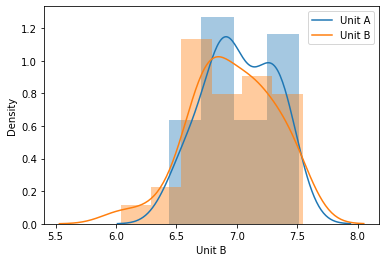

In [17]:
sns.distplot(data['Unit A'])
sns.distplot(data['Unit B'])
plt.legend(['Unit A','Unit B'])

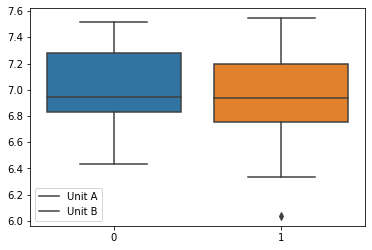

In [22]:
sns.boxplot(data=[data['Unit A'],data['Unit B']])
plt.legend(['Unit A','Unit B'])

In [24]:
alpha=0.05
UnitA = pd.DataFrame(data['Unit A'])
UnitA

,Unit A
0,6.8090
1,6.4376
2,6.9157
3,7.3012
4,7.4488
5,7.3871
6,6.8755
7,7.0621
8,6.6840
9,6.8236


In [25]:
UnitB = pd.DataFrame(data['Unit B'])
UnitB

,Unit B
0,6.7703
1,7.5093
2,6.7300
3,6.7878
4,7.1522
5,6.8110
6,7.2212
7,6.6606
8,7.2402
9,7.0503


In [26]:
print(UnitA,UnitB)

    Unit A
0   6.8090
1   6.4376
2   6.9157
3   7.3012
4   7.4488
5   7.3871
6   6.8755
7   7.0621
8   6.6840
9   6.8236
10  7.3930
11  7.5169
12  6.9246
13  6.9256
14  6.5797
15  6.8394
16  6.5970
17  7.2705
18  7.2828
19  7.3495
20  6.9438
21  7.1560
22  6.5341
23  7.2854
24  6.9952
25  6.8568
26  7.2163
27  6.6801
28  6.9431
29  7.0852
30  6.7794
31  7.2783
32  7.1561
33  7.3943
34  6.9405     Unit B
0   6.7703
1   7.5093
2   6.7300
3   6.7878
4   7.1522
5   6.8110
6   7.2212
7   6.6606
8   7.2402
9   7.0503
10  6.8810
11  7.4059
12  6.7652
13  6.0380
14  7.1581
15  7.0240
16  6.6672
17  7.4314
18  7.3070
19  6.7478
20  6.8889
21  7.4220
22  6.5217
23  7.1688
24  6.7594
25  6.9399
26  7.0133
27  6.9182
28  6.3346
29  7.5459
30  7.0992
31  7.1180
32  6.6965
33  6.5780
34  7.3875


In [27]:
tStat,pValue =sp.stats.ttest_ind(UnitA,UnitB)

In [28]:
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:[0.47223947] T-Statistic:[0.72286887]


In [30]:
sp.stats.ttest_ind(UnitA,UnitB)

Ttest_indResult(statistic=array([0.72286887]), pvalue=array([0.47223947]))

In [31]:
if pValue <0.05:
  print('we reject null hypothesis')
else:
  print('we accept null hypothesis')


we accept null hypothesis


In [32]:
#Inference : No significant difference in diameter of Unit A and Unit B
